In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import seaborn as sns 
from sklearn import svm
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [66]:
# Directory of the dataset 
filename = 'googl.us.txt'

# Read the file
Prgoo = pd.read_csv(filename,sep=',',index_col='Date')

# Prices is the predict value and initial the independet variable (y)
#prices = Prgoo['Close']
#initial = (Prgoo['Open'])

prices = Prgoo.iloc[0:1000,3].to_numpy()
initial = Prgoo.iloc[0:1000,0].to_numpy()

lab_enc = preprocessing.LabelEncoder()
prices = lab_enc.fit_transform(prices)
initial=initial.reshape(-1, 1)
 
#Convert to 1d Vector
#prices = np.reshape(prices, (len(prices), 1))
#initial = np.reshape(initial, (len(initial), 1))



In [67]:
xtrain, xtest, ytrain, ytest = train_test_split(initial, prices, test_size=0.33, random_state=42)
regressor = MLPRegressor(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
regressor.fit(xtrain, ytrain)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(5, 2), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

Train-set / R2 score: 0.9603879891415142
Train-set / MSE score: 3140.403323274185
Train-set / RMSE score: 56.03930159516788


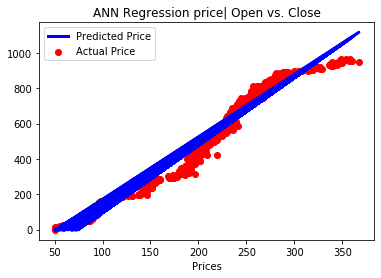

In [68]:
#Train Set Graph
print('Train-set /','R2 score:',r2_score(ytrain,regressor.predict(xtrain)))
print('Train-set /','MSE score:',mean_squared_error(ytrain,regressor.predict(xtrain)))
print('Train-set /','RMSE score:',sqrt(mean_squared_error(ytrain,regressor.predict(xtrain))))
plt.scatter(xtrain, ytrain, color='red', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtrain, regressor.predict(xtrain), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('ANN Regression price| Open vs. Close')
plt.legend()
plt.xlabel('Prices')
plt.show()

Test-set/ R2 score: 0.9605761226282732
Train-set / MSE score: 2901.485422331971
Train-set / RMSE score: 53.865438105820424


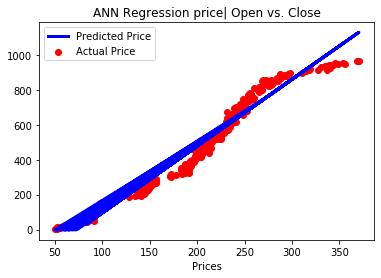

In [69]:
#Test Set Graph
print('Test-set/','R2 score:',r2_score(ytest,regressor.predict(xtest)))
print('Train-set /','MSE score:',mean_squared_error(ytest,regressor.predict(xtest)))
print('Train-set /','RMSE score:',sqrt(mean_squared_error(ytest,regressor.predict(xtest))))
plt.scatter(xtest, ytest, color='red', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtest, regressor.predict(xtest), color='blue', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('ANN Regression price| Open vs. Close')
plt.legend()
plt.xlabel('Prices')
plt.show()